In [1]:
# Import Libraries
import pandas as pd  
import numpy as np  

dataset = pd.read_csv('petrol_consumption.csv')  
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
## mean of target var. so that I can compare later with RMSE
dataset['Petrol_Consumption'].mean()

## RMSE < 10% of mean of target var

576.7708333333334

In [3]:
# Preparing the Data
# divide the data into attributes and labels
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)  

# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20,random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# The RandomForestRegressor class of the sklearn.ensemble library
# is used to solve regression problems via random forest. 
# The most important parameter of the RandomForestRegressor class 
# is the n_estimators parameter. 
# This parameter defines the number of trees in the random forest.

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


With 20 trees, the root mean squared error is ___ which is (less than/ not less than) 10 percent of the average petrol consumption ( i.e. 10% of 576.77 = 57.67). This indicate, that our ML model is (fine/not fine).

In [4]:
# If the number of estimators is changed to 200, the results are as follows:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.124500000000005
Mean Squared Error: 3497.802072500001
Root Mean Squared Error: 59.142219035981405


In [5]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")
print(bankdata.head()) 

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [6]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels, do :
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']  

# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state=0)


# Training the Algorithm.

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=21,random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

#  Adding more number of estimators doesn't necessarily improve the accuracy as the model learns from lesser number of estimators.

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


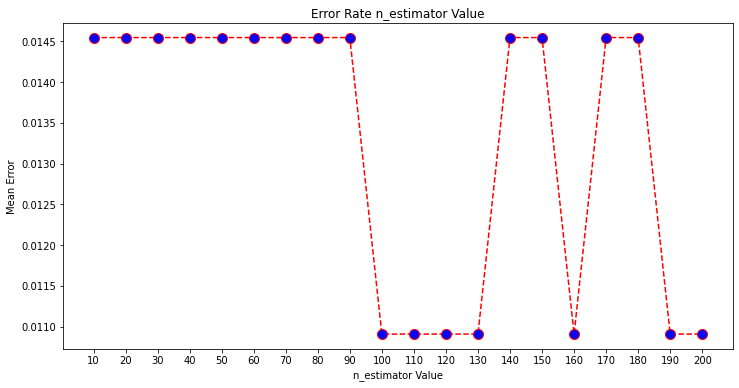

In [7]:
# follow hints to answer above Qn. of finding the best value of estimators.
# loop through values from 10 to 200, step by 10. 
# like -> for n_estimator in range(10, 201, 10):
# use n_estimator as variable in RandomForestClassifier 
# or  RandomForestRegressor something like this :

error = []   # declaring a list to hold performance values
# Calculating error for K values between 10 and 200, 
# stepping by 10 units each time
for i in range(10, 201, 10):  
    classifier = RandomForestClassifier(n_estimators = i,random_state=100)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))   
    # see below expln for np.mean()

#-- here != compares 2 ndarray objects 
#-- return value is array of true/false i.e 0/1 values, 
#-- of which we are finding the mean values.
    
#-- The above script executes a loop from 10 to 200, 
#   in steps of 10 -> 10, 20, 30,..... upto 200 
#-- In each iteration the mean error is calculated 
#-- and the result is appended to the error list.

#-- Now please plot the error values vs. n_estimator
plt.figure(figsize=(12, 6))  
plt.plot(range(10, 201, 10), error, color='red', 
         linestyle='dashed', marker='o', markerfacecolor='blue', 
         markersize=10)
plt.xticks(np.arange(10, 201, step=10))
plt.title('Error Rate n_estimator Value')  
plt.xlabel('n_estimator Value')  
plt.ylabel('Mean Error');    